In [8]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [ ]:
# doublons dans la base deezer ?

In [9]:
df = pd.read_csv('dataset/DEEZER_GLOBAL/DEEZER_GLOBAL.inter')

In [10]:
df = df[df.columns[:2]]

In [11]:
users = set(df['user_id:token'].tolist())

In [12]:
usr_histories = dict()
for usr in tqdm(users):
    df_user = df[df['user_id:token'] == usr]
    usr_histories[usr] = set(df_user['item_id:token'].tolist())

100%|██████████| 29981/29981 [01:49<00:00, 274.62it/s]


In [17]:
sim_matrix = np.zeros((len(users), len(users)))
sim_matrix.shape

(2,)

In [20]:
sim_matrix = np.zeros((len(users), len(users)))
users_list = list(users)
for i in tqdm(range(sim_matrix.shape[0])):
    for j in range(i):
        are_hist_equals = (usr_histories[users_list[i]] == usr_histories[users_list[j]])
        sim_matrix[i, j] = are_hist_equals
        sim_matrix[j, i] = are_hist_equals
    sim_matrix[i, i] = False


    

100%|██████████| 29981/29981 [10:43<00:00, 46.57it/s] 


In [21]:
np.sum(sim_matrix)

278.0

In [ ]:
indices = np.where(sim_matrix)

In [46]:
repetitive_couples = list(zip(list(indices[0]), list(indices[1])))

In [53]:
import networkx as nx

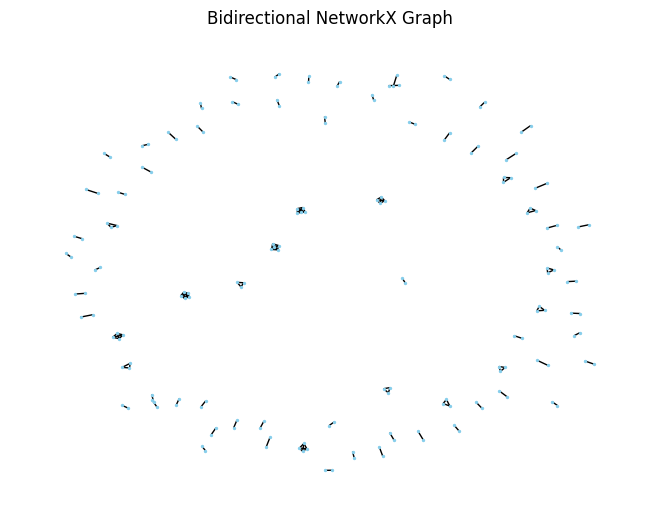

In [68]:
import matplotlib.pyplot as plt


G = nx.Graph()  # For an undirected graph

G.add_edges_from(repetitive_couples)

# Draw the graph
pos = nx.spring_layout(G)  # Layout for the graph
nx.draw(G, pos, with_labels=False, node_size=2, node_color="skyblue", edge_color="black", width = 1)

# Show the graph
plt.show()

In [70]:
list(nx.connected_components(G))

[{2592932862, 2620271342, 2640517322, 2643209202, 2646575382},
 {2353481548, 2644980162},
 {1653815626, 1877662526},
 {800380035, 2621276542, 2646041562},
 {2342116608, 2583617922},
 {2549671962, 2616731182},
 {2508180662, 2605612402},
 {2037916502, 2452152504, 2524034642},
 {11320700, 51908011, 537174035},
 {1366748484, 2243637524},
 {1550983606, 1609426102, 1998482626, 2558558322, 2632952222},
 {1163592102, 2336714604},
 {774092167, 1216057146, 2349320608},
 {1287889688, 2595536462},
 {182649811, 1957664582},
 {1450196666, 2029821466},
 {947472583, 2165913508, 2495723266, 2589490562, 2646721362},
 {2455694584, 2607307182},
 {228169643, 1573154886},
 {1438193626, 2604903602},
 {35364501, 2445056064},
 {1459691162, 2208838844},
 {1484010122, 2233273424, 2521875162},
 {1806295642, 2419300964},
 {1595548982, 2508468502},
 {14795976, 2643455522},
 {1087570948, 1211535986, 1858617466, 2149738926},
 {847671483, 1252864686, 2478662588},
 {1741877126, 2251913448},
 {2529264082, 2633022342},
 